In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np   # 배열 사용할 때 numpy
import cv2
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


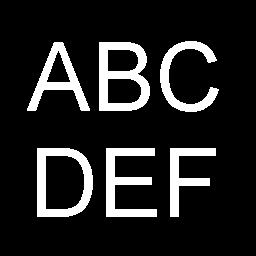

In [2]:
img = cv2.imread('/content/gdrive/My Drive/images/abcdef.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gimg1)

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
numLabels, labels = cv2.connectedComponents(gray_img)
print(numLabels)

7


In [4]:
print(labels.shape)
print(labels)

(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
label_H = np.uint8(179 * labels / np.max(labels))
print(label_H)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


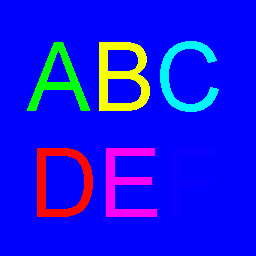

In [6]:
bank = 255 * np.ones_like(label_H)
labelImg = cv2.merge((label_H, bank, bank))
labelImg = cv2.cvtColor(labelImg, cv2.COLOR_HSV2RGB)

cv2_imshow(labelImg)

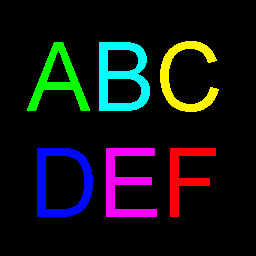

In [7]:
bank = 255 * np.ones_like(label_H)
labelImg = cv2.merge((label_H, bank, bank))
labelImg = cv2.cvtColor(labelImg, cv2.COLOR_HSV2BGR)
labelImg[label_H == 0] = 0
cv2_imshow(labelImg)

(256, 256, 3)


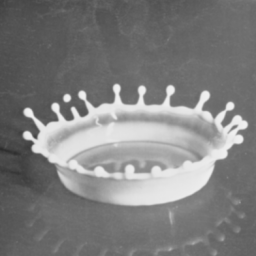

In [9]:
img = cv2.imread('/content/gdrive/My Drive/images/milkdrop.bmp')
print(img.shape)
gimg2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gimg2)

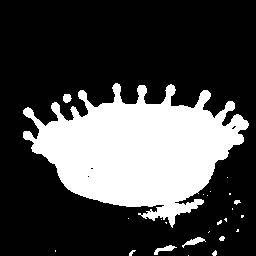

In [10]:
ret, thresh = cv2.threshold(gimg2, 127, 255, 0)
cv2_imshow(thresh)

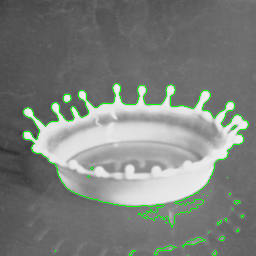

In [11]:
contour, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img = cv2.drawContours(img, contour, -1, (0, 255, 0), 1)
cv2_imshow(img)

원형율